In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
data = pd.read_excel(r"Attacks on Political Leaders in Pakistan.csv")

In [6]:
data.head()

,S#,Politician,Day,Date,Day Type,Time,City,Location,Location Category,Province,Latitude,Longititude,Target Category,Space (Open/Closed),Party,Target Status,Killed,Injured
0,1,Liaqat Ali Khan,Tuesday,1951-10-16,Working Day,Evening,Rawalpindi,"Company Bagh (Company Gardens), Rawalpindi",Park/Ground,Punjab,33.605800,73.043700,Target,Open,Alll India Muslim League,Killed,1,1
1,2,Khan abdul Jabbar Khan,Friday,1958-05-09,Working Day,Morning,Lahore,"Sadullah Khan's house at 16 Aikman Road, GOR",Residence,Punjab,31.482635,74.071272,Target,Open,Chief Minister of West Pakistan,Killed,1,0
2,3,Hayyat Sherpao,Friday,1985-02-08,Working Day,Evening,Peshawar,Campus of University of Peshawar,University,KPK,33.999533,71.425020,Target,Open,PPPP,Killed,1,0
3,4,Najeeb Ahmed,Friday,1990-04-06,Working Day,After Noon,Karachi,North Nazimabad,Residence,Sindh,24.991800,66.991100,Target,Closed,Student wing of PPP,Killed,1,0
4,5,Azeem Ahmed Tariq,Saturday,1993-05-01,Working Day,Morning,Karachi,near his house,Residence,Sindh,24.991800,66.991100,Target,Closed,MQM,Killed,1,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   S#                   51 non-null     int64         
 1   Politician           51 non-null     object        
 2   Day                  51 non-null     object        
 3   Date                 51 non-null     datetime64[ns]
 4   Day Type             51 non-null     object        
 5   Time                 51 non-null     object        
 6   City                 51 non-null     object        
 7   Location             51 non-null     object        
 8   Location Category    48 non-null     object        
 9   Province             51 non-null     object        
 10  Latitude             51 non-null     float64       
 11  Longititude          51 non-null     float64       
 12  Target Category      51 non-null     object        
 13  Space (Open/Closed)  51 non-null     

In [8]:
data.drop(['S#','Location', 'Location Category', 'Space (Open/Closed)', 'Date'], axis =1, inplace = True)

In [9]:
data.isnull().sum()

Politician         0
Day                0
Day Type           0
Time               0
City               0
Province           0
Latitude           0
Longititude        0
Target Category    0
Party              0
Target Status      0
Killed             0
Injured            0
dtype: int64

In [12]:
data['Longititude'].nunique()

26

In [13]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(data['Politician'])
data['Politician'] = LE.transform(data['Politician'])

LE = LabelEncoder()
LE.fit(data['Day'])
data['Day'] = LE.transform(data['Day'])

LE = LabelEncoder()
LE.fit(data['Day Type'])
data['Day Type'] = LE.transform(data['Day Type'])

LE = LabelEncoder()
LE.fit(data['Time'])
data['Time'] = LE.transform(data['Time'])

LE = LabelEncoder()
LE.fit(data['City'])
data['City'] = LE.transform(data['City'])

LE = LabelEncoder()
LE.fit(data['Province'])
data['Province'] = LE.transform(data['Province'])

LE = LabelEncoder()
LE.fit(data['Target Category'])
data['Target Category'] = LE.transform(data['Target Category'])

LE = LabelEncoder()
LE.fit(data['Party'])
data['Party'] = LE.transform(data['Party'])

LE = LabelEncoder()
LE.fit(data['Target Status'])
data['Target Status'] = LE.transform(data['Target Status'])


In [14]:
data.head()

,Politician,Day,Day Type,Time,City,Province,Latitude,Longititude,Target Category,Party,Target Status,Killed,Injured
0,21,5,1,1,22,5,33.605800,73.043700,1,2,1,1,1
1,19,0,1,3,15,5,31.482635,74.071272,1,8,1,1,0
2,15,0,1,1,20,4,33.999533,71.425020,1,21,1,1,0
3,29,0,1,0,12,6,24.991800,66.991100,1,24,1,1,0
4,5,2,1,3,12,6,24.991800,66.991100,1,14,1,1,0


In [15]:

column_names = ["Politician", "Day", "Day Type", "Time", "City", "Province", "Latitude", "Longititude", "Target Category", "Party", "Killed", "Injured", "Target Status"]

data = data.reindex(columns=column_names)

In [16]:
data.head()

,Politician,Day,Day Type,Time,City,Province,Latitude,Longititude,Target Category,Party,Killed,Injured,Target Status
0,21,5,1,1,22,5,33.605800,73.043700,1,2,1,1,1
1,19,0,1,3,15,5,31.482635,74.071272,1,8,1,0,1
2,15,0,1,1,20,4,33.999533,71.425020,1,21,1,0,1
3,29,0,1,0,12,6,24.991800,66.991100,1,24,1,0,1
4,5,2,1,3,12,6,24.991800,66.991100,1,14,1,0,1


In [19]:
X = data.iloc[:, :12]
Y = data.iloc[:, 12]

In [21]:
X.shape

(51, 12)

In [22]:
Y.shape

(51,)

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=100)

In [40]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [41]:
seed = 7
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, train_X, train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)

LR: 52.500000 (0.283945)
LDA: 55.000000 (0.187083)
KNN: 42.500000 (0.160078)
CART: 65.000000 (0.165831)
NB: 57.500000 (0.317214)
SVM: 52.500000 (0.175000)


In [ ]:
#The Above result provides the list of each algorithm short name, the mean accuracy and standard deviation accuracy
# We conclude that Naive bayes and decision tree classifier has better accuracy compared to other algorithms in which the predicted result would have around 60% matched with actual result.

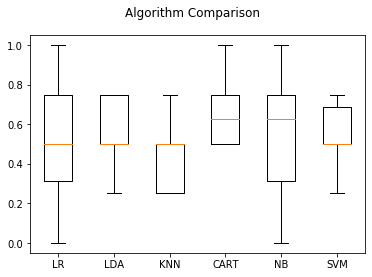

In [43]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()